In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import os
import struct

In [2]:
'''
test torch
'''
x = torch.rand(5,3)
print(x)

tensor([[0.2496, 0.1095, 0.5510],
        [0.4810, 0.0065, 0.2594],
        [0.9221, 0.1985, 0.2851],
        [0.6651, 0.6781, 0.2808],
        [0.1247, 0.7747, 0.5102]])


In [3]:
'''
for simplicity, use code from CSE152A
'''

path = "mnist/"

def read(dataset = "training", datatype='images'):
    """
    Python function for importing the MNIST data set.  It returns an iterator
    of 2-tuples with the first element being the label and the second element
    being a numpy.uint8 2D array of pixel data for the given image.
    """
    
    if dataset is "training":
        fname_img = os.path.join(path, 'train-images.idx3-ubyte')
        fname_lbl = os.path.join(path, 'train-labels.idx1-ubyte')
    elif dataset is "testing":
        fname_img = os.path.join(path, 't10k-images.idx3-ubyte')
        fname_lbl = os.path.join(path, 't10k-labels.idx1-ubyte')

    # Load everything in some numpy arrays
    with open(fname_lbl, 'rb') as flbl:
        magic, num = struct.unpack(">II", flbl.read(8))
        lbl = np.fromfile(flbl, dtype=np.int8)

    with open(fname_img, 'rb') as fimg:
        magic, num, rows, cols = struct.unpack(">IIII", fimg.read(16))
        img = np.fromfile(fimg, dtype=np.uint8).reshape(len(lbl), rows, cols)
    
    if(datatype=='images'):
        get_data = lambda idx: img[idx]
    elif(datatype=='labels'):
        get_data = lambda idx: lbl[idx]

    # Create an iterator which returns each image in turn
    for i in range(len(lbl)):
        yield get_data(i)
        
trainData=np.array(list(read('training','images')))
trainLabels=np.array(list(read('training','labels')))
testData=np.array(list(read('testing','images')))
testLabels=np.array(list(read('testing','labels')))

<>:14: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:17: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:14: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:17: SyntaxWarning: "is" with a literal. Did you mean "=="?
<ipython-input-3-4ac204ca8a72>:14: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if dataset is "training":
<ipython-input-3-4ac204ca8a72>:17: SyntaxWarning: "is" with a literal. Did you mean "=="?
  elif dataset is "testing":


In [4]:
print(trainData.shape, trainLabels.shape)
print(testData.shape, testLabels.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [5]:
def DataBatch(data, label, batchsize, shuffle=True):
    n = data.shape[0]
    if shuffle:
        index = np.random.permutation(n)
    else:
        index = np.arange(n)
    for i in range(int(np.ceil(n/batchsize))):
        inds = index[i*batchsize : min(n,(i+1)*batchsize)]
        yield data[inds], label[inds]

# tests the accuracy of a classifier
def test(testData, testLabels, classifier):
    batchsize=50
    correct=0.
    for data,label in DataBatch(testData,testLabels,batchsize,shuffle=False):
        prediction = classifier(data)
        correct += np.sum(prediction==label)
    return correct/testData.shape[0]*100

# a sample classifier
# given an input it outputs a random class
class RandomClassifier():
    def __init__(self, classes=10):
        self.classes=classes
    def __call__(self, x):
        return np.random.randint(self.classes, size=x.shape[0])

In [6]:
randomClassifier = RandomClassifier()
print('Random classifier accuracy: %f' % 
      test(testData, testLabels, randomClassifier))

Random classifier accuracy: 10.100000


# KNN

In [7]:
from sklearn.neighbors import KNeighborsClassifier
class KNNClassifer():
    def __init__(self, k=3):
        # k is the number of neighbors involved in voting
        """ ==========
        YOUR CODE HERE
        ========== """
        self.classifier = KNeighborsClassifier(n_neighbors=k)
    def train(self, trainData, trainLabels):
        """ ==========
        YOUR CODE HERE
        ========== """
        #print(trainData.shape)
        trainData = np.reshape(trainData, (trainData.shape[0], trainData.shape[1]*trainData.shape[2]))
        #print(trainData.shape)
        self.classifier.fit(trainData,trainLabels)
    def __call__(self, x):
        # this method should take a batch of images
        # and return a batch of predictions
        """ ==========
        YOUR CODE HERE
        ========== """
        x = np.reshape(x, (x.shape[0], x.shape[1]*x.shape[2]))
        '''
        predictions = np.empty((x.shape[0]))
        for i in range(0,testData.shape[0]):
            predictions[i] = self.classifier.predict(x[i].reshape(1,-1))
        '''
        predictions = self.classifier.predict(x)
        #print(x.shape)
        
        return predictions

# test your classifier with only the first 100 training examples (use this
# while debugging)
# note you should get ~ 65 % accuracy
knnClassiferX = KNNClassifer()
knnClassiferX.train(trainData[:100], trainLabels[:100])
print ('KNN classifier accuracy: %f'%test(testData, testLabels, knnClassiferX))

KNN classifier accuracy: 64.760000


In [8]:
%%time
# test your classifier with all the training examples (This may take a while)
knnClassifer = KNNClassifer()
knnClassifer.train(trainData, trainLabels)
print ('KNN classifier accuracy: %f'%test(testData, testLabels, knnClassifer))

KNN classifier accuracy: 97.050000
Wall time: 1min 29s


k=1 done
k=2 done
k=3 done
k=4 done
k=5 done
k=6 done
k=7 done
k=8 done
k=9 done
k=10 done


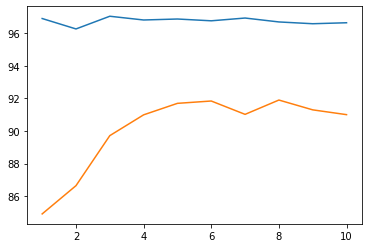

In [10]:
import time
x=[1,2,3,4,5,6,7,8,9,10]
y=[]
time_list=[]
for i in range(1,11):
    current_time = time.time()
    knnClassifer_tmp = KNNClassifer(k=i)
    knnClassifer_tmp.train(trainData, trainLabels)
    y.append(test(testData, testLabels, knnClassifer_tmp))
    new_time = time.time()
    time_list.append(new_time-current_time)
    print("k=%d done"%i)
plt.plot(x,y)
plt.plot(x,time_list)
plt.show()

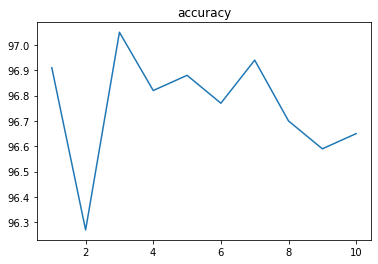

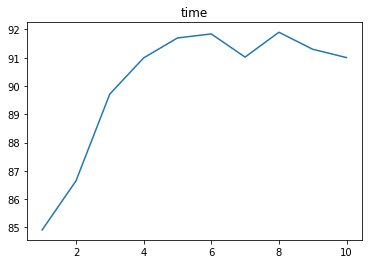

In [11]:
plt.plot(x,y)
plt.title("accuracy")
plt.show()
plt.plot(x,time_list)
plt.title("time")
plt.show()

# Fast KNN where majority rules

In [22]:
import random
from scipy.stats import mode
class  New_KNNClassifer():
    def __init__(self, k=3):
        # k is the number of neighbors involved in voting
        """ ==========
        YOUR CODE HERE
        ========== """
        self.classifier = []
        for i in range(0,10):
            self.classifier.append(KNeighborsClassifier(n_neighbors=k))
        #print(self.classifier)
    def train(self, trainData, trainLabels):
        """ ==========
        YOUR CODE HERE
        ========== """
        #print(trainData.shape)
        trainData = np.reshape(trainData, (trainData.shape[0], trainData.shape[1]*trainData.shape[2]))
        #print(trainData.shape)
        stratified_train_data = np.split(trainData,10)
        #print(stratified_train_data[0].shape)
        stratified_train_labels = np.split(trainLabels,10)
        #print(stratified_train_labels[0].shape)
        for i in range(0,10):
            self.classifier[i].fit(stratified_train_data[i],stratified_train_labels[i])
    def predict(self, testData, choice_num):
        testData = np.reshape(testData, (testData.shape[0], testData.shape[1]*testData.shape[2]))
        choices = []
        predictions = np.empty((testData.shape[0]))
        #print(predictions.shape)
        prediction_single = np.empty((choice_num,testData.shape[0]))
        #print(prediction_single)
        for i in range(0,choice_num):
            choices.append(random.randint(0,9))

        for j in range(0,choice_num):
            #print(testData[i].reshape(1,-1).shape)
            #print(self.classifier[j].predict(testData[i].reshape(1,-1)).shape)
            #print(self.classifier[j].predict(testData).shape)
            prediction_single[j] = self.classifier[choices[j]].predict(testData)
            #print(self.classifier[j].predict(testData).shape)
        
        temp = np.empty((choice_num))
        for i in range(0,testData.shape[0]):
            for j in range(0,choice_num):
                temp[j] = prediction_single[j][i]
            predictions[i] = mode(temp)[0][0]
        return predictions
        
    def __call__(self, x,partial=3):
        # this method should take a batch of images
        # and return a batch of predictions
        """ ==========
        YOUR CODE HERE
        ========== """
        results = self.predict(x,partial)
        
        return results

'''
new_knnClassiferX = New_KNNClassifer()
new_knnClassiferX.train(trainData[:100], trainLabels[:100])
print ('KNN classifier accuracy: %f'%test(testData, testLabels, new_knnClassiferX))
'''

"\nnew_knnClassiferX = New_KNNClassifer()\nnew_knnClassiferX.train(trainData[:100], trainLabels[:100])\nprint ('KNN classifier accuracy: %f'%test(testData, testLabels, new_knnClassiferX))\n"

In [23]:
%%time
# test your classifier with all the training examples (This may take a while)
new_knnClassifer = New_KNNClassifer()
new_knnClassifer.train(trainData, trainLabels)
print ('KNN classifier accuracy: %f'%test(testData, testLabels, new_knnClassifer))

KNN classifier accuracy: 94.470000
Wall time: 35.7 s


In [24]:
import time
x=[i for i in range(1,11)]
y=[]
time_list=[]
for i in range(1,11):
    current_time = time.time()
    knnClassifer_tmp = New_KNNClassifer(k=i)
    knnClassifer_tmp.train(trainData, trainLabels)
    y.append(test(testData, testLabels, knnClassifer_tmp))
    new_time = time.time()
    time_list.append(new_time-current_time)
    print("k=%d done"%i)

k=1 done
k=2 done
k=3 done
k=4 done
k=5 done
k=6 done
k=7 done
k=8 done
k=9 done
k=10 done


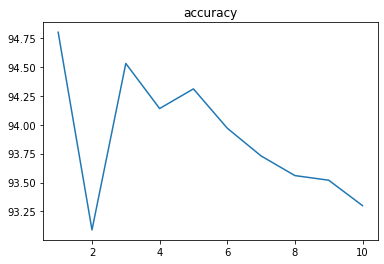

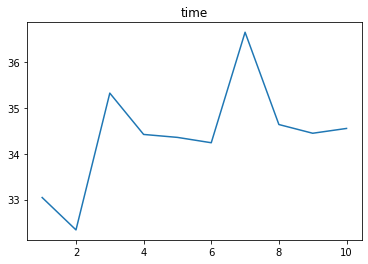

In [25]:
plt.plot(x,y)
plt.title("accuracy")
plt.show()
plt.plot(x,time_list)
plt.title("time")
plt.show()

In [26]:
# tests the accuracy of a classifier
def test_with_param(testData, testLabels, classifier,partial):
    batchsize=50
    correct=0.
    for data,label in DataBatch(testData,testLabels,batchsize,shuffle=False):
        prediction = classifier(data,partial)
        correct += np.sum(prediction==label)
    return correct/testData.shape[0]*100




In [27]:
import time
x=[i for i in range(1,21)]
y=[]
time_list=[]
for i in range(1,21):
    current_time = time.time()
    knnClassifer_tmp = New_KNNClassifer()
    knnClassifer_tmp.train(trainData, trainLabels)
    y.append(test_with_param(testData, testLabels, knnClassifer_tmp,partial=i))
    new_time = time.time()
    time_list.append(new_time-current_time)
    print("partial=%d done"%i)


partial=1 done
partial=2 done
partial=3 done
partial=4 done
partial=5 done
partial=6 done
partial=7 done
partial=8 done
partial=9 done
partial=10 done
partial=11 done
partial=12 done
partial=13 done
partial=14 done
partial=15 done
partial=16 done
partial=17 done
partial=18 done
partial=19 done
partial=20 done


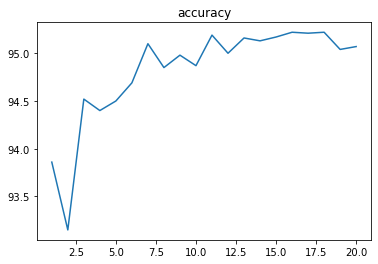

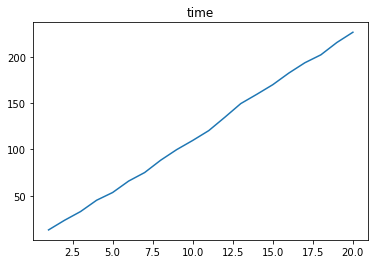

In [28]:

plt.plot(x,y)
plt.title("accuracy")
plt.show()
plt.plot(x,time_list)
plt.title("time")
plt.show()

# PCAKNN

In [29]:
class PCAKNNClassifer():
    def __init__(self, components=25, k=3):
        # components = number of principal components
        # k is the number of neighbors involved in voting
        """ ==========
        YOUR CODE HERE
        ========== """
        self.classifier = KNeighborsClassifier(n_neighbors=3)
        self.components = components
    def train(self, trainData, trainLabels):
        """ ==========
        YOUR CODE HERE
        ========== """
        trainData = np.reshape(trainData, (trainData.shape[0], trainData.shape[1]*trainData.shape[2]))
        if(trainData.shape[0]>trainData.shape[1]):
            u, s, vh = np.linalg.svd(trainData,full_matrices=False)
            #print("used economy")
        else:
            u, s, vh = np.linalg.svd(trainData)
        #print(vh.shape)
        self.w = vh[:self.components]
        self.w = self.w.T
        data = np.ndarray((trainData.shape[0],self.components))
        for i in range (0,trainData.shape[0]):
            #print(self.w.shape)
            #print(trainData[i].shape)
            data[i] = np.dot(trainData[i],self.w)
        self.classifier.fit(data,trainLabels)
        #print(self.w.shape)
        
    def __call__(self, x):
        # this method should take a batch of images
        # and return a batch of predictions
        """ ==========
        YOUR CODE HERE
        ========== """
        x = np.reshape(x, (x.shape[0], x.shape[1]*x.shape[2]))
        data = np.ndarray((x.shape[0],self.components))
        for i in range (0,x.shape[0]):
            data[i] = np.dot(x[i],self.w)
        
        return self.classifier.predict(data)

# test your classifier with only the first 100 training examples (use this
# while debugging)
pcaknnClassiferX = PCAKNNClassifer()
pcaknnClassiferX.train(trainData[:100], trainLabels[:100])
print ('KNN classifier accuracy: %f'%test(testData, testLabels, pcaknnClassiferX))

KNN classifier accuracy: 66.480000


In [30]:
%%time
# test your classifier with all the training examples
pcaknnClassifer = PCAKNNClassifer()
pcaknnClassifer.train(trainData, trainLabels)
print ('PCAKNN classifier accuracy: %f'%test(testData, testLabels, pcaknnClassifer))

PCAKNN classifier accuracy: 97.380000
Wall time: 22.9 s


In [32]:
import time
x=[i for i in range(5,50,5)]
y=[]
time_list=[]
for i in range(5,50,5):
    current_time = time.time()
    knnClassifer_tmp = PCAKNNClassifer(components=i)
    knnClassifer_tmp.train(trainData, trainLabels)
    y.append(test(testData, testLabels, knnClassifer_tmp))
    new_time = time.time()
    time_list.append(new_time-current_time)
    print("k=%d done"%i)

k=5 done
k=10 done
k=15 done
k=20 done
k=25 done
k=30 done
k=35 done
k=40 done
k=45 done


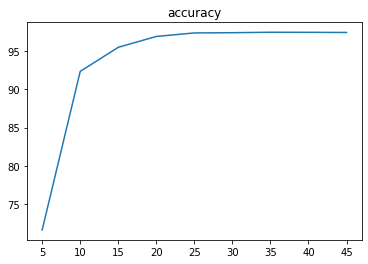

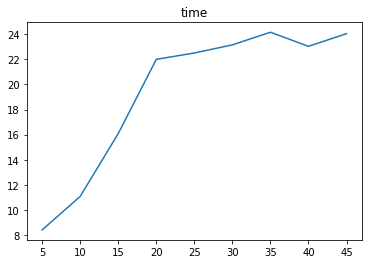

In [33]:
plt.plot(x,y)
plt.title("accuracy")
plt.show()
plt.plot(x,time_list)
plt.title("time")
plt.show()